In [57]:
#import librabies
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import fashion_mnist

In [58]:
#load the dataset
(xTrain, yTrain), (xTest, yTest) = fashion_mnist.load_data()

In [59]:
xTrain.shape

(60000, 28, 28)

In [60]:
#reshape the input data and it's type conversion from int to float32
xTrain = xTrain.reshape(-1, 28, 28, 1).astype('float32')/255.0
xTest = xTest.reshape(-1, 28, 28, 1).astype('float32')/255.0
#CNN needs channels so that's why (28,28,1) also it's gray scale image that why channel=1

In [61]:
yTrain = keras.utils.to_categorical(yTrain)
yTest = keras.utils.to_categorical(yTest)
#convert the integer values to their one-hot encoded representation(means to binary repre. where each label is 0 or 1)

In [62]:
yTrain

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D( pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D( pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [64]:
model.compile( loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(xTrain, yTrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4419 - accuracy: 0.8394
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2956 - accuracy: 0.8916
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2485 - accuracy: 0.9085
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2177 - accuracy: 0.9187
Epoch 5/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1927 - accuracy: 0.9273


In [31]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 2s 5ms/step - loss: 0.3236 - accuracy: 0.9023


[0.3235554099082947, 0.9023000001907349]

In [32]:
pred_values = model.predict(xTest)
pred_values[0:10]

313/313 [==============================] - 2s 5ms/step


array([[2.29391373e-09, 1.30897229e-11, 6.67885303e-10, 9.84254345e-10,
        1.37905277e-11, 5.91401431e-07, 2.96936295e-11, 8.15932071e-06,
        5.37942711e-11, 9.99991298e-01],
       [7.52277003e-07, 1.34018527e-15, 9.99980330e-01, 2.14341956e-12,
        1.76929843e-05, 1.50948691e-14, 1.19475658e-06, 7.16671189e-16,
        7.79468382e-14, 2.01144978e-15],
       [1.17727550e-10, 1.00000000e+00, 8.83795316e-13, 2.13820959e-13,
        3.52822723e-15, 7.31992109e-17, 7.49574963e-14, 1.79182828e-23,
        3.54540789e-12, 4.11261857e-20],
       [1.25494832e-08, 1.00000000e+00, 7.84992693e-09, 5.22738581e-08,
        1.56637503e-09, 1.77568694e-13, 2.93924121e-08, 1.00937335e-17,
        1.17563175e-12, 6.75525166e-15],
       [3.48620683e-01, 1.14641974e-09, 4.06198017e-03, 1.28341946e-06,
        1.14252290e-03, 6.82161883e-09, 6.46173477e-01, 5.12530469e-11,
        6.37427307e-12, 1.40918539e-08],
       [2.12723194e-06, 9.99997139e-01, 6.83152678e-07, 1.68949941e-11,
   

In [33]:
pred_categories =  np.argmax(pred_values, axis=1)
#pred_categories is an array that contains the predicted class labels for each input sample.

In [34]:
pred_categories[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [39]:
test_categories= np.argmax(yTest, axis=1)

In [40]:
test_categories[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

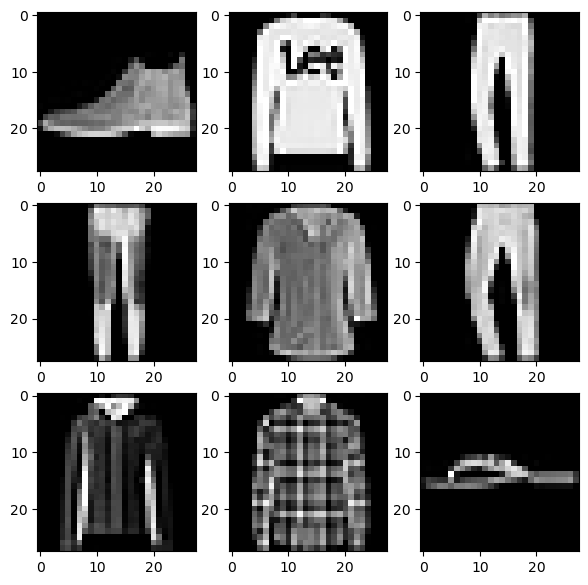

In [42]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots( 3, 3 , figsize=(7,7))
num=0
for i in range (3):
    for j in range (3):
        axis[i][j].imshow(xTest[num], cmap='gray')
        num+=1

In [ ]:
# The provided code is for training a convolutional neural network (CNN) on the Fashion MNIST dataset 
# and visualizing the predictions using matplotlib. Here's an explanation of the code:

# Importing the required libraries: numpy, keras, Sequential, Conv2D, MaxPool2D, Flatten, Dense, fashion_mnist, 
# and matplotlib.pyplot.Loading the Fashion MNIST dataset: fashion_mnist.load_data() loads the dataset and splits 
# it into training and test sets, assigning them to xTrain, yTrain, xTest, and yTest variables.
# One-hot encoding the target labels: keras.utils.to_categorical(yTrain) and keras.utils.to_categorical(yTest) 
# convert the categorical labels yTrain and yTest into one-hot encoded vectors, respectively.

# Creating the CNN model: model = Sequential() creates a sequential model. 
# The subsequent model.add() statements add layers to the model. The architecture includes two pairs of convolutional 
# and max pooling layers, followed by a flatten layer, and two fully connected (dense) layers. The activation functions used 
# are 'relu' for intermediate layers and 'softmax' for the output layer.

# Compiling the model: model.compile() specifies the loss function ('categorical_crossentropy'), 
# optimizer ('adam'), and evaluation metric ('accuracy') for the model.

# # Training the model: model.fit() trains the model on the training data (xTrain and yTrain) for a 
# specified number of epochs (10 in this case).

# Evaluating the model: model.evaluate() computes the loss and accuracy of the trained model on the test data (xTest and yTest).

# Predicting the categories: pred_values = model.predict(xTest) generates predictions 
# for the test data. np.argmax(pred_values, axis=1) finds the indices of the maximum values along the rows 
# (axis=1), giving the predicted categories for each sample.

# Comparing the predicted and true categories: pred_categories[0:10] displays the predicted categories for the first 
# 10 test samples, and test_categories[0:10] shows the true categories for the same samples.

# Visualizing the images: The last part of the code uses matplotlib to create a 3x3 grid of subplots. 
# Each subplot displays a grayscale image from the xTest dataset. The nested for loops iterate over the subplots, 
# and axis[i][j].imshow(xTest[num], cmap='gray') displays the image at the corresponding subplot. The num variable is 
# incremented to move to the next image. The resulting grid of subplots provides a visual representation of the test images.